# IMPORTING REQUIRED LIBRARY API'S

In [28]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis, skew, probplot, norm
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn import linear_model, cross_validation
from sklearn.kernel_ridge import KernelRidge
import warnings
from sklearn.model_selection import KFold
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

# LOAD DATASET
<li>Problem statement provides with a regression dataset, of type csv. 
<li>We can load the data using either numpy arrays or using the pandas DataFrame. 
<li>I have selected DataFrames for quick and easy implementation. 
<li>Since the normalization/scaling is a one step process.

In [29]:
#fname variable to store the path of the csv file
fname = '/Users/anishine912/Downloads/ML Exam/regression_data.csv'
df = pd.read_csv(fname)

In [30]:
#shape gives us the matrix dimensions, in this case 21613*21
df.shape

(21613, 21)

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Below I am dropping the id and date attributes from the DataFrame. As they have negligible affect on the other attributes.

In [32]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)

## SUMMARIZING DATA

In [33]:
#descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
print("Skewness: ", df['price'].skew())
print("Kurtosis: ", df['price'].kurt())

Skewness:  4.02406914468
Kurtosis:  34.5855404319


<li>Skewness is the variation value between the dataset distribution and a normal distributions
<li>Similarly kurtosis is the measure of shape for distribution

## ATTRIBUTE CORRELATION

In [35]:
#computing the correlation amongst the attributes
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [9]:
#np = df1.as_matrix()
#print("mean : ", np.mean())
#print("var  : ", np.var())
#print("skew : ",skew(df))
#print("kurt : ",kurtosis(np))

In [36]:
corr = df.corr()
k = 15   #selecting 15 attributes based on the better correlation coefficient
cols = corr.nlargest(k, 'price')['price'].index
df = df[cols]

I have selected the value of 15 randomly also it gave the most promising results as compared to 5 and 10, k = 18 gives the best performance, but the code takes quite lot of time to execute. 

# NORMALIZATION
### Many times the data distribution is either too scattered or too concentrated, in such case we need to use normalization to transform the distribution into a more generalized distribution.

<li> The price value is the target value in the given dataset, so we generalize price first
<li> I have scaled all the attributes that can be normalized.

## Before normalization

Text(0.5,1,'Feature Histogram')

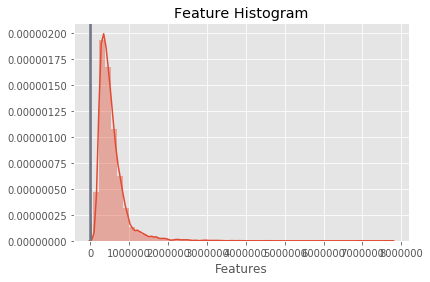

In [37]:
#plots for the df variables before normalization
sns.distplot(df['price'])
sns.distplot(df['sqft_living'])
sns.distplot(df['sqft_living15'])
sns.distplot(df['sqft_above'])
plt.xlabel('Features')
plt.title('Feature Histogram')

Text(0.5,1,'Feature variation plot')

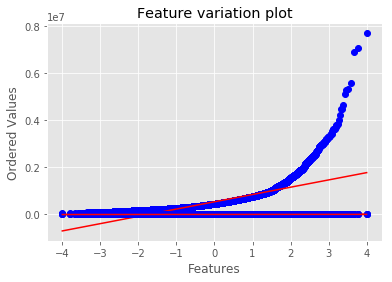

In [38]:
#probplot shows the deviation of the features from the linear models
res = probplot(df['price'], plot = plt)
res = probplot(df['sqft_living'], plot = plt)
res = probplot(df['sqft_living15'], plot = plt)
res = probplot(df['sqft_above'], plot = plt)
plt.xlabel('Features')
plt.title('Feature variation plot')

In [39]:
#sns.distplot(df1['price'])
#res = probplot(df['price'])

In [40]:
#sns.distplot(df1['sqft_living'])
#res = probplot(df['price'])

In [41]:
#sns.distplot(df1['sqft_lot'])
#res = probplot(df['price'])

In [42]:
# normalizatoin using emath for better performance
df['price'] = np.emath.log(df['price'])
df['sqft_living'] = np.emath.log(df['sqft_living'])
df['sqft_living15'] = np.emath.log(df['sqft_living15'])
df['sqft_above'] = np.emath.log(df['sqft_above'])
df['sqft_lot'] = np.emath.log(df['sqft_lot'])
df['sqft_lot15'] = np.emath.log(df['sqft_lot15'])
#df['yr_built'] = np.emath.log(df['yr_built'])
#df['zipcode'] = np.emath.log(df['zipcode'])
#df['lat'] = np.emath.log(df['lat'])
#df['long'] = np.emath.log(df['long'])

## After Normalization
<tab> I have used emath.log function to scale the attribute value. Scaling is necessary because if it isnt done, then the MSE value turns out to be very huge and the R^2 square is quite low as well.

Text(0.5,1,'Feature Normality Histogram')

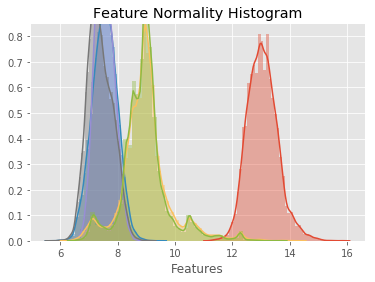

In [43]:
#plots for the df variables after normalization
sns.distplot(df['price'])
sns.distplot(df['sqft_living'])
sns.distplot(df['sqft_living15'])
sns.distplot(df['sqft_above'])
sns.distplot(df['sqft_lot'])
sns.distplot(df['sqft_lot15'])
plt.xlabel('Features')
plt.title('Feature Normality Histogram')

### The attributes are more visible!! The plot below shows us that almost all the features are linearly separable.

Text(0.5,1,'Feature normalized variation plot')

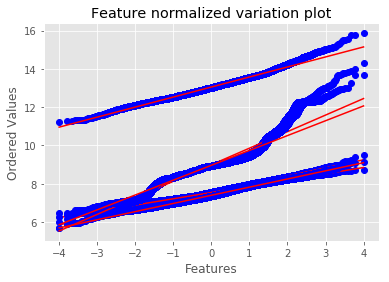

In [44]:
res = probplot(df['price'], plot = plt)
res = probplot(df['sqft_living'], plot = plt)
res = probplot(df['sqft_living15'], plot = plt)
res = probplot(df['sqft_above'], plot = plt)
res = probplot(df['sqft_lot'], plot = plt)
res = probplot(df['sqft_lot15'], plot = plt)
plt.xlabel('Features')
plt.title('Feature normalized variation plot')

# LASSO ALGORITHM
### Here we'll go throught the working of Lasso algorithm!!

In [45]:
y = df.iloc[:, 0:1]  #y holds the value of price, so y is the target variable
X = df.iloc[:,:]
X.drop('price', axis = 1, inplace = True)   #price is the target value so no need to include it in the train set

In [46]:
#kf = KFold(n_splits=5) # Define the split - into 2 folds 
#kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#KFold(n_splits=5, random_state=None, shuffle=False)

In [47]:
#for train_index, test_index in kf.split(X):
    #print(“TRAIN:”, train_index, “TEST:”, test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

#normal train_test_split on X,y, test_size is 0.2, 
#random_state signifies the randomness into the splits based on the probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<li> Down below is the implementation of LASSO algorithm. LassoCV function from the scikit-learn is used here
<li> ls is our model which characterized with LassoCV, cv = 5 denotes cross-validation generator.
<li> Best alpha is found to be 0.001

In [48]:
ls = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 2], max_iter = 5000, cv = 5)
ls.fit(X_train, y_train)
alpha = ls.alpha_
print("Best alpha parameter :", alpha)
pred = ls.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
print ('LASSO Testing MSE value: ', mse)

Best alpha parameter : 0.001
LASSO Testing MSE value:  0.072377200896


In [49]:
r2 = r2_score(y_true = y_test, y_pred = pred)
print ('R-square score for LASSO : ', r2)

R-square score for LASSO :  0.749375060337


# OLS ALGORITHM
#### In OLS we we try to minimize the sum of the square of differences between the prediction.

In [50]:
least_sq = linear_model.LinearRegression()
least_sq.fit(X_train, y_train)
y_pred = least_sq.predict(X_test)

LinearRegression() from the sklearn.LinearModel already uses the least square method. So we can directly use that to define our model.

In [51]:
mse_ols = mean_squared_error(y_true=y_test, y_pred=y_pred)
print ('MSE value for OLS : ', mse_ols)
r2 = r2_score(y_true = y_test, y_pred = y_pred)
print ('R-square score for OLS : ', r2)

MSE value for OLS :  0.0721154164348
R-square score for OLS :  0.750281557328


# KERNELIZED RIDGE REGRESSION

### Kernelized Ridge Regression(krr) is mostly used to perform regression analysis on non-linear datasets. So basically in krr we perform linear ridge regression on a non-linear dataset(multi-featured data).
### There are three most used kernels for krr :
<li> Linear kernel :
     - def linear_kernel2(x,xp):
           return x.dot(xp.T)
<li> Polynomial kernel :
     - def poly_kernel2(x, xp, alpha = 1, deg = 2) :
           return np.power(x.dot(xp.T) + alpha, deg)
<li> Gaussian kernel : RBF
     - def RBF_kernel2(x, xp, sigma = 1) :
           return np.exp(-(np.linalg.norm(x.T - xp.T, ord =2) ** 2)/ (2 * (sigma ** 2)))
<li> I have used GridsearchCV in krr, to tune in the hyperparameters given in the problem statement. It optimizes by cross validation grid  search over hyperparameters.

In [52]:
linear = KernelRidge(kernel = 'linear', gamma = None, degree = None, coef0 = 1, kernel_params = None, alpha = 1)
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=linear_pred)
print ('Linear Kernel MSE :', mse)
r2 = r2_score(y_true = y_test, y_pred = linear_pred)
print ('R-Square score for Linear kernel : ', r2)

Linear Kernel MSE : 0.101405902682
R-Square score for Linear kernel :  0.648855607477


In [53]:
poly = GridSearchCV(KernelRidge(kernel = 'polynomial', coef0 = 1, gamma = 1), cv = 5, param_grid = {'degree':[2,4,7]})
poly.fit(X_train, y_train)
poly_pred = poly.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=poly_pred)
print ('Polynomial Kernel MSE :', mse)
r2 = r2_score(y_true = y_test, y_pred = poly_pred)
print ('R-Square score for Polynomial kernel : ', r2)

Polynomial Kernel MSE : 0.0737987408302
R-Square score for Polynomial kernel :  0.744452607468


In [55]:
rbf = GridSearchCV(KernelRidge(kernel = 'rbf', coef0 = 1), cv = 5, param_grid = {'gamma':[0.1,0.5,1,2,4]}) #find best hyper_param
rbf.fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=rbf_pred)
print ('Gaussian Kernel MSE :', mse)
r2 = r2_score(y_true = y_test, y_pred = rbf_pred)
print ('R-Square score for Gaussian kernel : ', r2)

Gaussian Kernel MSE : 7.92233196502
R-Square score for Gaussian kernel :  -26.4331411845


## Program Concepts

<li>First thing to be done with dataset acquired, is to load it into a dataframe or numpy arrays, even pca if u want to plot datasets with more than 2 attributes.
<li>After loading , preprocessing is the next step, here we clean the data and drop the values as well. 
<li>After cleaning we split the data since it makes it more easy for us to manage and work with. 
<li>I have preformed few small operations to get an idea about the dataset. Got to know about the statistics about the attributes.

# PERFORMANCE
## Following are the MSE and R_square values for each of the algorithm :

<li>LASSO
    - Best alpha parameter : 0.001
    - Testing MSE value:  0.072377200896
    - R-square score:  0.749375060337

<li>OLS
    - MSE value:  0.0721154164348
    - R-square score:  0.750281557328

<li>Linear krr
    - MSE : 0.101405902682
    - R-Square score:  0.648855607477

<li>Polyn krr
    - MSE : 0.0737987408302
    - R-Square score:  0.744452607468

<li>RBF krr
    - MSE : 7.92233196502
    - R-Square score:  -26.4331411845

In [56]:
print('The best performing algorithm on this dataset is OLS')
print('Best MSE : ', mse_ols)
print('R-Square : 0.750281557328')

The best performing algorithm on this dataset is OLS
Best MSE :  0.0721154164348
R-Square : 0.750281557328
